In [1]:
# You will need an older version of plotly for this notebook
# !conda remove plotly -y && conda install -c plotly plotly=3.10.0=py_0 -y

In [2]:
# You will need orca to save to file. On ubuntu 18.04 there is a 
# documented missing dependency of libgconf2-4, which you should install
# in your environment with `sudo apt -y install libgconf2-4`
# !conda remove plotly-orca -y && conda install -c plotly plotly-orca==1.2.1 psutil requests -y

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append('../')
from common.plot_style_utils import set_pub_plot_context, save_for_pub

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, plot, iplot
from sklearn.metrics import roc_curve, auc, roc_auc_score

%matplotlib inline
init_notebook_mode(connected=True)

In [4]:
# Process the country predictions to get per-country data
predictions = np.load("../../data/results/rf/predictions_TEST_countries_seq_meta_selforno.npy")
true = np.load("../../data/tts/y_test_country.pkl")
true = true == 33 # True if US, else False
class_labels = np.load("../../data/results/rf/classes_for_predictions_countries_seq_selforno.npy")
# To translate y indexes to country names
encoder = pickle.load(open("../../data/encoders/country_to_index_ordinal_encoder.pkl","rb"))

In [5]:
predictions.shape

(10502, 2)

In [6]:
true.shape

(10502,)

In [7]:
def acc(pred, true, class_labels=class_labels):
    index = np.argmax(pred, axis=1)
    classes = class_labels[index]
    correct = (classes == true)
    #print(true.shape)
    accuracy = np.sum(correct) / len(true)
    return accuracy

In [8]:
acc_usa = acc(predictions,true, class_labels)

In [9]:
acc_usa

0.8421253094648639

In [10]:
set_pub_plot_context()
sns.color_palette()

[(0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.8666666666666667, 0.8, 0.4666666666666667),
 (0.06666666666666667, 0.4666666666666667, 0.2),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.6666666666666666, 0.26666666666666666, 0.6),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.6, 0.6, 0.2),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.4, 0.06666666666666667, 0.0)]

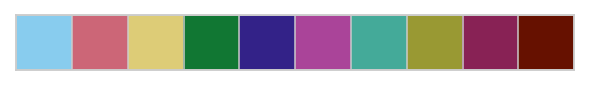

In [11]:
sns.palplot(sns.color_palette())

In [12]:
data = [go.Choropleth(
    locations = ['USA',"AUS","GBR", "AGO"], # Color two fara way countries to get a full span of the colorbar
    z = [acc_usa*100, 0, 100,50],
    text = ["United States", "Australia", "UK", "Angola"],
    colorscale = [
        [0, "rgb(0.8, 0.4, 0.4666666666666667)"],
        [1, "rgb(255,255,255)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 1
            #color = 'rgb(255,255,255)',
            #width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '%',
        title = 'Accuracy (%)'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Per-country Accuracy'
    ),
    geo = go.layout.Geo(
        scope="world",
        showframe = True,
        showcoastlines = True,
        projection = go.layout.geo.Projection(
            type = "robinson"
        )
    ),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename = 'd3-world-map')
pio.write_image(fig, '../../data/manuscript/figs/3/full_us_vs_rest.pdf')

In [13]:
# Now make the ROC AUC 

predictions

array([[0.234, 0.766],
       [0.299, 0.701],
       [0.238, 0.762],
       ...,
       [0.173, 0.827],
       [0.378, 0.622],
       [0.82 , 0.18 ]])

In [14]:
class_labels

array([False,  True])

In [15]:
predictions = predictions[:,1]

In [16]:
predictions

array([0.766, 0.701, 0.762, ..., 0.827, 0.622, 0.18 ])

In [17]:
fpr, tpr, thresh = roc_curve(true,predictions)
roc_auc = auc(fpr,tpr)

roc_auc_score(true,predictions)

0.9286297722749244

In [18]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.84333239e-04,
       2.84333239e-04, 2.84333239e-04, 2.84333239e-04, 2.84333239e-04,
       2.84333239e-04, 2.84333239e-04, 2.84333239e-04, 2.84333239e-04,
       2.84333239e-04, 2.84333239e-04, 2.84333239e-04, 2.84333239e-04,
       2.84333239e-04, 2.84333239e-04, 2.84333239e-04, 2.84333239e-04,
      

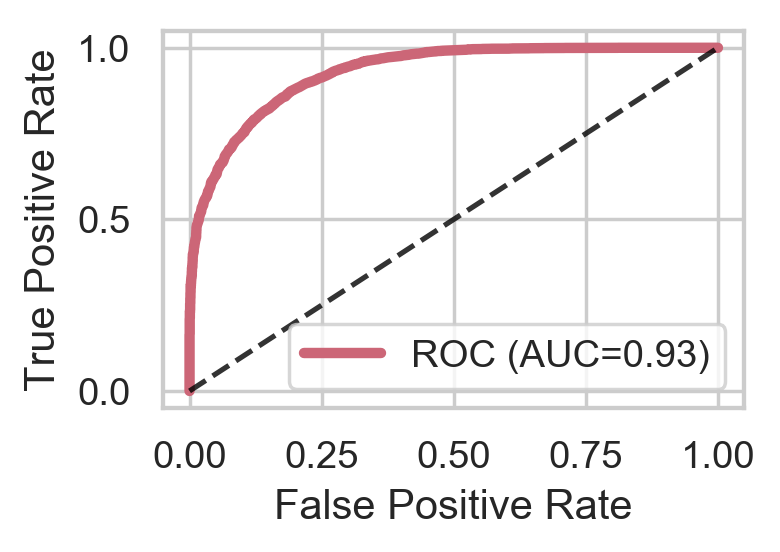

In [19]:
set_pub_plot_context(context="notebook")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="False Positive Rate",
                    ylabel="True Positive Rate")
palette = sns.color_palette()
ax.plot(fpr, tpr, c=palette[1], alpha=1, linewidth=3, label="ROC (AUC=%0.2f)" % roc_auc)
ax.plot([0,1],[0,1], '--k', alpha=.8)
ax.legend()
!mkdir ../../data/manuscript/figs/3/b
save_for_pub(fig, path="../../data/manuscript/figs/3/b/v0", dpi=500)
 